In [1]:
import pandas as pd
import numpy as np

import field_embeddings as fe

from fos.model import FieldModel
from fos.settings import ASSETS_DIR
from fos.entity import embed_entities
from fos.vectors import embed_fasttext, embed_tfidf

mag_texts = pd.read_pickle(ASSETS_DIR / 'fields/example_text.pkl.gz')
meta = pd.read_pickle(ASSETS_DIR / 'fields/fos.pkl.gz')
attrs = pd.read_pickle('../assets/fields/fos.pkl.gz')
fields = FieldModel("en")
attrs = attrs.loc[fields.index]

parents = fe.create_parent_table(attrs)
parents = parents.loc[parents.child_id.isin(fields.index)]

fe.load_fonts()

{'fonts/NunitoSans-SemiBold.ttf': <matplotlib.font_manager.FontProperties at 0x7fa42152e5b0>,
 'fonts/NunitoSans-Bold.ttf': <matplotlib.font_manager.FontProperties at 0x7fa42152e9d0>,
 'fonts/NunitoSans-ExtraLight.ttf': <matplotlib.font_manager.FontProperties at 0x7fa42152e640>,
 'fonts/NunitoSans-Black.ttf': <matplotlib.font_manager.FontProperties at 0x7fa42152e580>,
 'fonts/NunitoSans-Regular.ttf': <matplotlib.font_manager.FontProperties at 0x7fa42152e940>,
 'fonts/NunitoSans-Light.ttf': <matplotlib.font_manager.FontProperties at 0x7fa42152e3a0>}

In [2]:
ft_tsne = fe.fit_tsne(fields.field_fasttext.index, fields.index, attrs)

/home/james/miniconda3/envs/field-of-study-pipelines/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


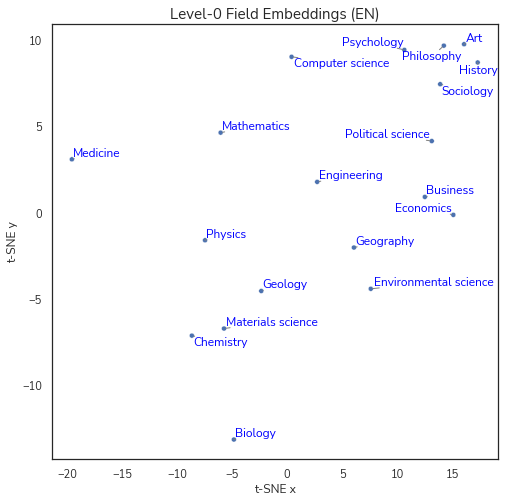

In [3]:
fe.plot_l0_scatter(ft_tsne, 'en')

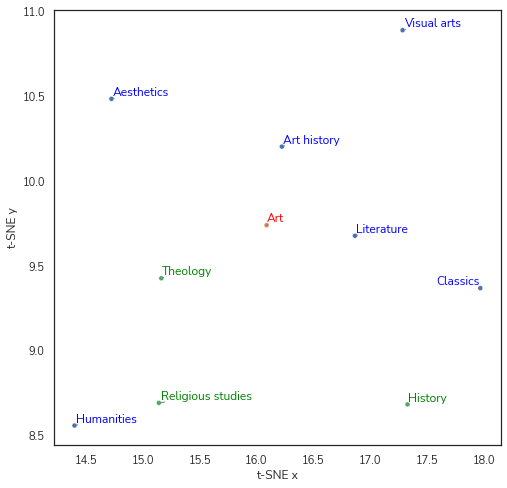

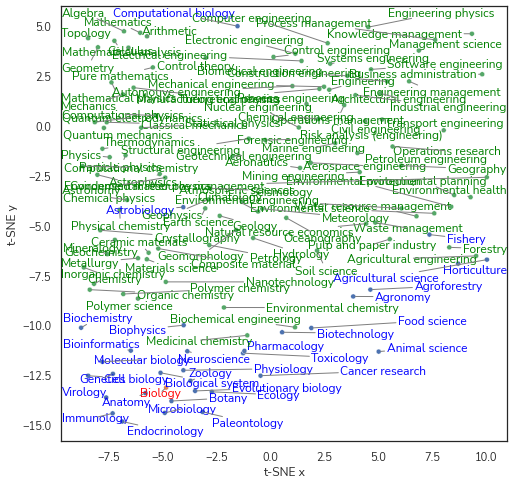

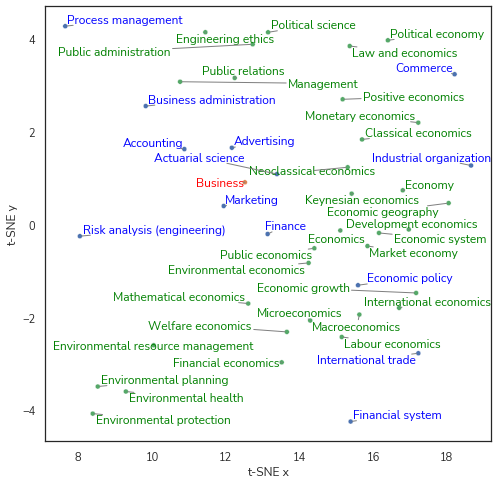

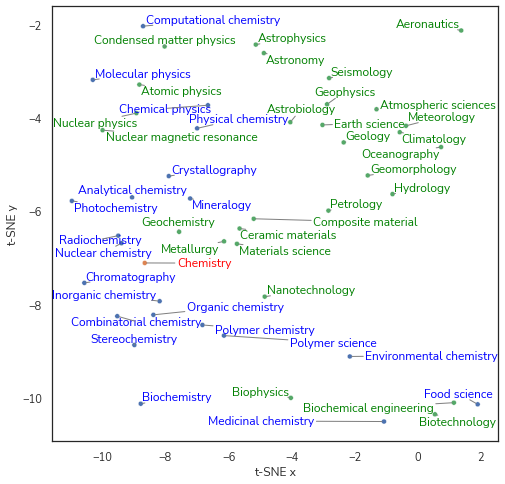

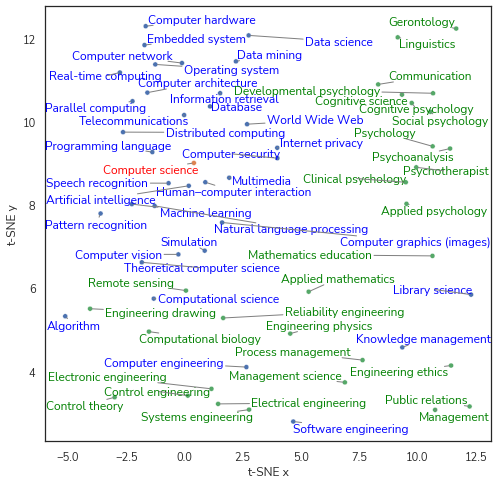

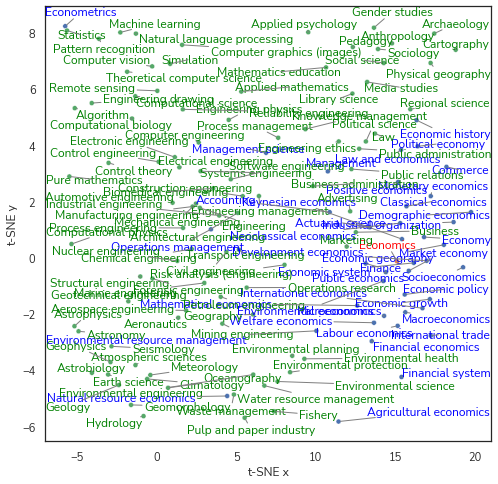

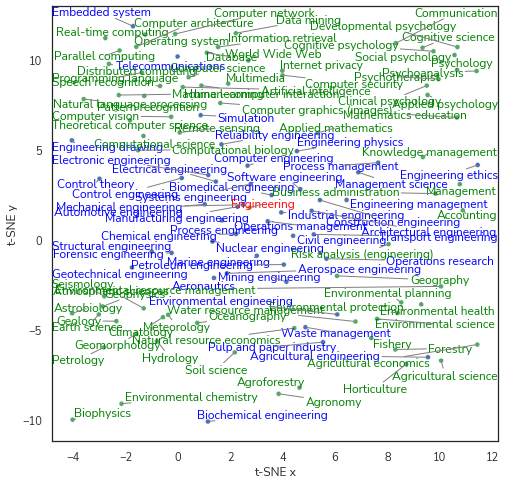

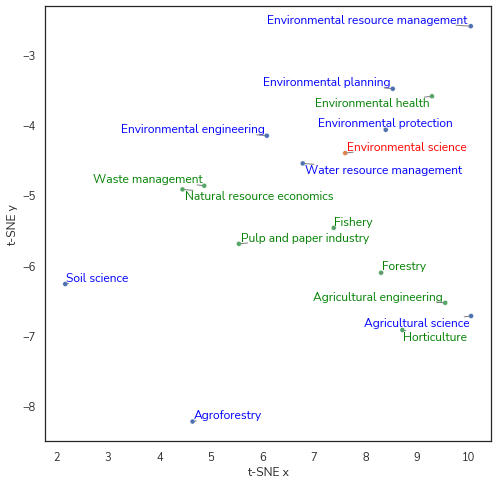

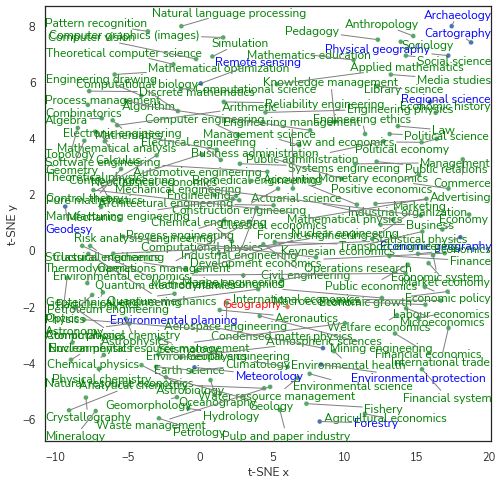

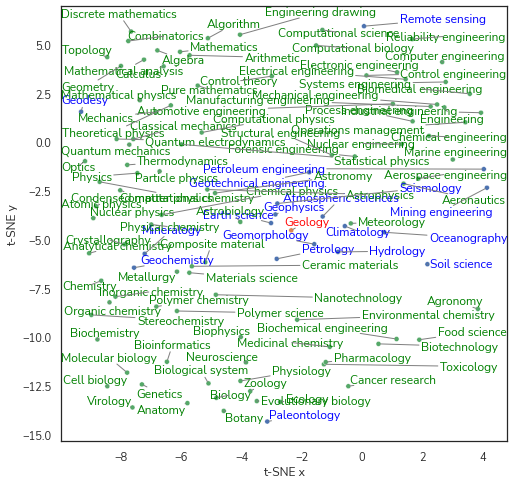

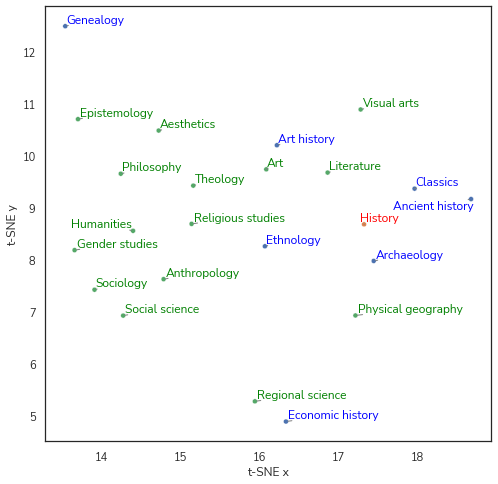

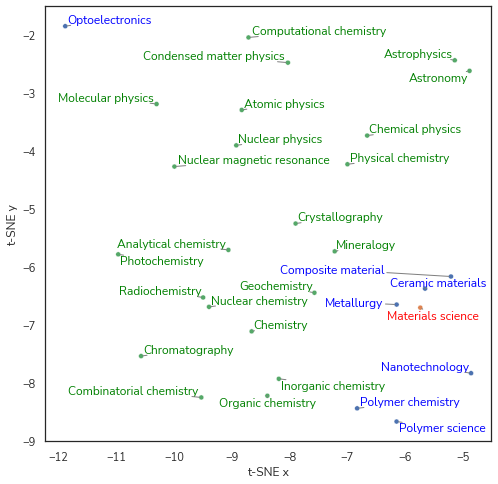

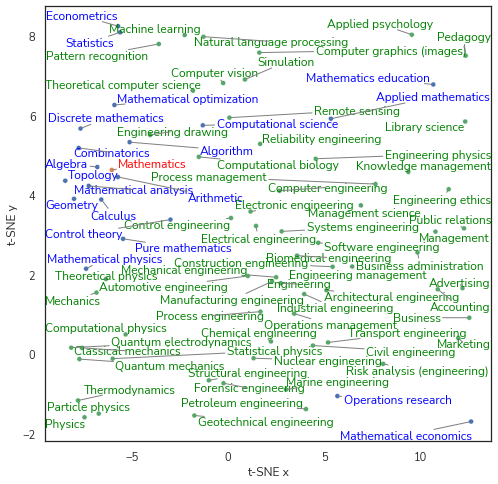

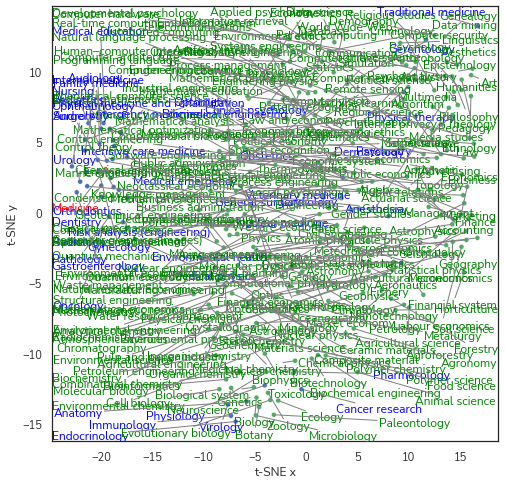

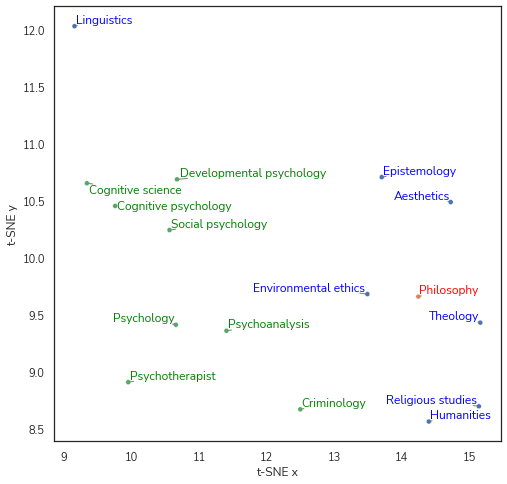

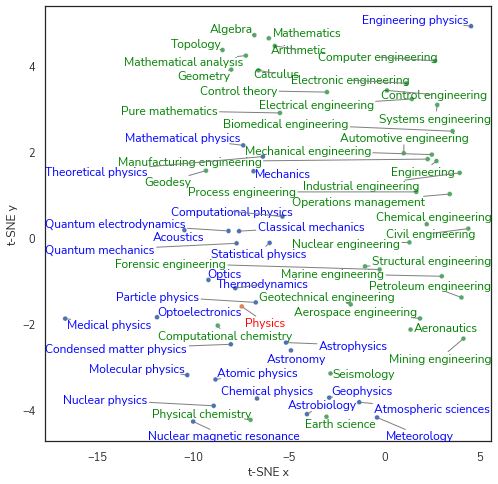

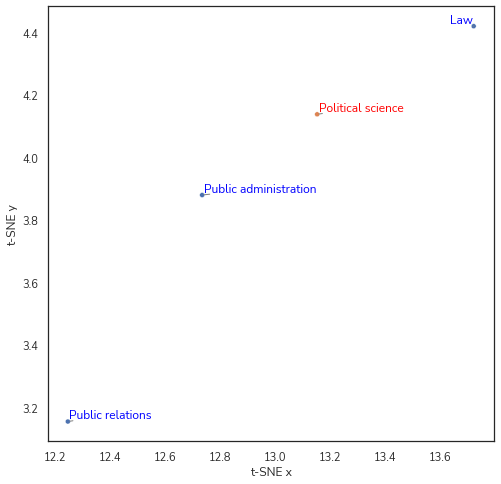

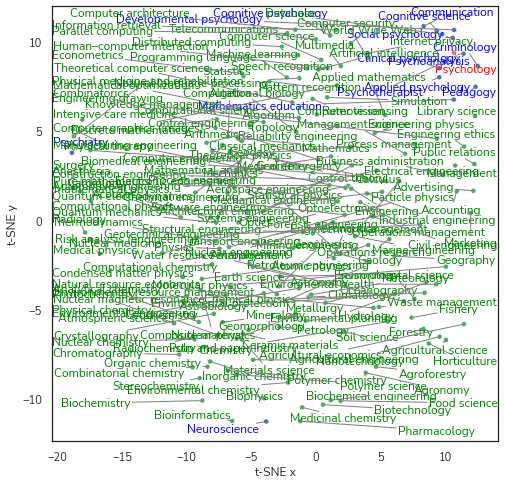

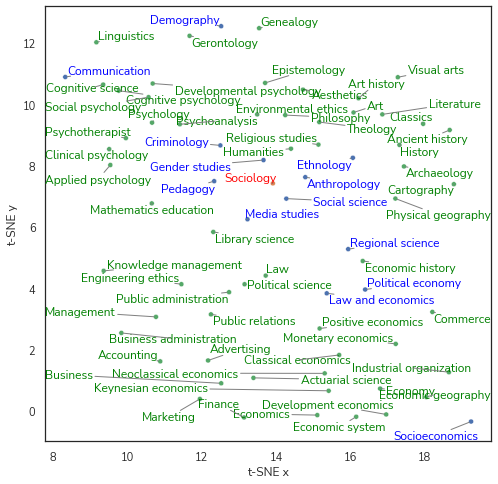

In [7]:
tsne_df = ft_tsne.copy()

fe.set_scale(1)
scatters = []
for parent_name, children in parents.groupby('parent_name'):
    
    child_tsne = tsne_df.loc[children['child_id']].copy()
    neighbors_tsne = tsne_df.loc[(tsne_df.x < child_tsne.x.max()) & (tsne_df.x > child_tsne.x.min()) \
                            & (tsne_df.y < child_tsne.y.max()) & (tsne_df.y > child_tsne.y.min())].copy()
    neighbors_tsne = neighbors_tsne.loc[~neighbors_tsne.index.isin(child_tsne.index)]
    neighbors_tsne = neighbors_tsne.loc[neighbors_tsne.display_name != parent_name]
    if not neighbors_tsne.shape[0]:
        neighbors_tsne = None
    parent_tsne = tsne_df.query(f'level == 0 & display_name == "{parent_name}"').copy()

    scatter = fe.plot_tsne(child_tsne, parent_tsne=parent_tsne, neighbors_tsne=neighbors_tsne)
    scatters.append(scatter)
#     fe.sns.set_theme('notebook', 'white')

#     fe.plt.figure(figsize=(8, 8))
#     fe.plt.rcParams['font.family'] = 'sans-serif'
#     fe.plt.rcParams['font.sans-serif'] = fe.FONT_NAME

#     tsne_df['relationship'] = 'Child'
#     tsne_df['text_color']='blue'

#     #plot parent point
#     if parent_tsne is not None:
#         parent_tsne['relationship']='Parent'
#         parent_tsne['text_color']='orange'
#         tsne_df = pd.concat([tsne_df, parent_tsne], ignore_index=True)

#     if neighbors_tsne is not None:
#         neighbors_tsne['relationship']='Neighbor'
#         neighbors_tsne['text_color']='red'
#         tsne_df = pd.concat([tsne_df, neighbors_tsne], ignore_index=True)

#     scatter = fe.sns.scatterplot(x='x', y='y', data=tsne_df, s=25, hue='relationship', legend=False)

#     scatter.set_xlabel('t-SNE x')
#     scatter.set_ylabel('t-SNE y')
#     texts = []
#     for i in range(0, tsne_df.shape[0]):
#         text = scatter.text(tsne_df.x[i],
#                             tsne_df.y[i],
#                             tsne_df['display_name'][i],
#                             horizontalalignment='left',
#                             color=tsne_df['text_color'][i])
#         texts.append(text)

#     fe.adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=1))

# neighbors.shape, parent_tsne.shape, child_tsne.shape
# pd.concat([child_tsne, neighbors])

In [ ]:
for scatter in scatters:
    scatter.show()

In [6]:
tsne_df

,x,y,normalized_name,display_name,main_type,level,created_date
40700,18.659302,1.269466,industrial organization,Industrial organization,None,1,2016-06-24
459310,-1.316504,5.747836,computational science,Computational science,None,1,2016-06-24
1276947,-4.879851,-2.617906,astronomy,Astronomy,None,1,2016-06-24
1862650,-18.807617,5.113467,physical therapy,Physical therapy,medicine.medical_specialty,1,2016-06-24
1965285,-3.021279,-4.156169,earth science,Earth science,None,1,2016-06-24
...,...,...,...,...,...,...,...
548259974,-21.218557,6.335433,audiology,Audiology,medicine.medical_specialty,1,2016-06-24
549774020,13.662795,-2.313919,welfare economics,Welfare economics,None,1,2016-06-24
556039675,16.728785,13.215965,traditional medicine,Traditional medicine,None,1,2016-06-24
556758197,17.227039,2.192733,monetary economics,Monetary economics,None,1,2016-06-24
